## Análise da série histórica de preços de soja no porto de Paranaguá - PR

In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
dados = pd.read_csv(r"C:\Users\Cauai Capozzoli 2\Desktop\Alura\projetos\preço_soja\soybean_price.csv", sep=';')

In [66]:
dados

,Data,� vista R$,� vista US$
0,29/07/1997,"18,04","16,66"
1,30/07/1997,"17,97","16,59"
2,31/07/1997,"18,17","16,78"
3,01/08/1997,"18,1","16,71"
4,04/08/1997,"18,23","16,83"
...,...,...,...
6046,09/11/2021,"156,36","28,52"
6047,10/11/2021,"156,62","28,5"
6048,11/11/2021,"156,11","28,92"
6049,12/11/2021,"156,39","28,67"


In [67]:
dados.columns = ["Data", "Preco_Real", "Preco_Dolar"]
dados

,Data,Preco_Real,Preco_Dolar
0,29/07/1997,"18,04","16,66"
1,30/07/1997,"17,97","16,59"
2,31/07/1997,"18,17","16,78"
3,01/08/1997,"18,1","16,71"
4,04/08/1997,"18,23","16,83"
...,...,...,...
6046,09/11/2021,"156,36","28,52"
6047,10/11/2021,"156,62","28,5"
6048,11/11/2021,"156,11","28,92"
6049,12/11/2021,"156,39","28,67"


### Verificando inconsistências nos dados

##### I - inconsistência: Valores das colunas "Preco_Real" e "Preco_Dolar" em string e são float64

In [68]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6051 entries, 0 to 6050
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         6051 non-null   object
 1   Preco_Real   6051 non-null   object
 2   Preco_Dolar  6051 non-null   object
dtypes: object(3)
memory usage: 141.9+ KB


In [69]:
dados['Data'].unique()

array(['29/07/1997', '30/07/1997', '31/07/1997', ..., '11/11/2021',
       '12/11/2021', '16/11/2021'], dtype=object)

In [70]:
dados['Preco_Real'].unique()

array(['18,04', '17,97', '18,17', ..., '156,11', '156,39', '159,08'],
      dtype=object)

In [71]:
dados['Preco_Dolar'].unique()

array(['16,66', '16,59', '16,78', ..., '31,55', '30,7', '30,25'],
      dtype=object)

In [72]:
dados.isnull().sum()

Data           0
Preco_Real     0
Preco_Dolar    0
dtype: int64

In [73]:
dados['Preco_Real'] = dados['Preco_Real'].apply(lambda x: str(x).replace(",",".")).astype("float64")

In [74]:
dados['Preco_Dolar'] = dados['Preco_Dolar'].apply(lambda x: str(x).replace(",",".")).astype("float64")

In [75]:
datas = dados['Data'].str.split('/', expand=True)

##### II - inconsistência: Valor da coluna "Data" deve ter somente os anos, descartar dias e meses

In [76]:
anos = datas.drop(columns=[0,1],axis=1)

In [77]:
dados = dados.drop(columns=['Data'], axis=1)

In [78]:
dados.shape

(6051, 2)

In [79]:
datas.shape

(6051, 3)

In [80]:
anos.shape

(6051, 1)

In [81]:
dados = pd.concat([anos,dados],axis=1)

In [82]:
dados.columns = ["Ano", "Preco_Real", "Preco_Dolar"]

In [83]:
dados.head()

,Ano,Preco_Real,Preco_Dolar
0,1997,18.04,16.66
1,1997,17.97,16.59
2,1997,18.17,16.78
3,1997,18.10,16.71
4,1997,18.23,16.83


### Análises dos Dados de Preços de soja

#### I- Análise para os preços em R$

In [135]:
print(dados['Ano'].unique())

['1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
 '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020' '2021']


In [136]:
grupo_ano = dados.groupby('Ano')
grupo_ano.groups

{'1997': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], '1998': [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, ...], '1999': [354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 

In [137]:
media_anual_real = grupo_ano['Preco_Real'].mean().round(2)

In [138]:
media_anual_real

Ano
1997     19.33
1998     14.75
1999     18.13
2000     19.13
2001     23.80
2002     33.31
2003     40.75
2004     42.27
2005     31.39
2006     28.31
2007     34.66
2008     46.24
2009     47.01
2010     40.03
2011     46.49
2012     66.11
2013     65.42
2014     64.68
2015     68.34
2016     77.43
2017     66.20
2018     78.55
2019     76.79
2020    115.86
2021    165.52
Name: Preco_Real, dtype: float64

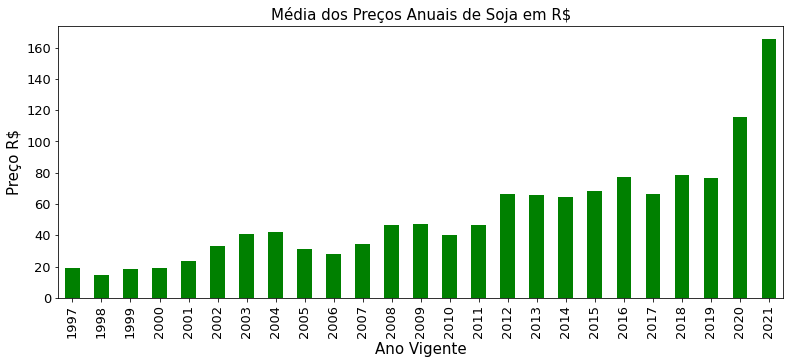

In [140]:
plt.figure(figsize = (13,5))
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
media_anual_real.plot(kind='bar', color = 'g')
plt.title('Média dos Preços Anuais de Soja em R$', fontsize=15)
plt.xlabel('Ano Vigente',fontsize=15 )
plt.ylabel('Preço R$', fontsize=15)
plt.show()